# In this assignment we learn about numerical stabiity of the covariance matrix, fitting $\chi^2$ distributions, to correct for the Hartlap factor.

## For this assignment no external packages are required. You just need a running conda environment, where numpy and matplotlib are installed.

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
from numpy.linalg import inv, eigvals
from scipy.special import gamma, factorial
from scipy.optimize import curve_fit
from scipy.stats import chi2 as chi2_scp

## Preparation: load in the data we need for this assignment.

In [3]:
model=np.load('data_4_assignment1/reference_model.npy') # This will be our reference model
cov=np.load('data_4_assignment1/covariance.npy') # This is the analytical covariance matrix, which we assume is the true covariance of the data

print('The dimension of the Model: ', model.shape)
print('The dimenstion of the Cov. Matrix: ', cov.shape)


The dimension of the Model:  (900,)
The dimenstion of the Cov. Matrix:  (900, 900)


## Task 1: Create two sets of 10000 noisy Gaussian data vectors each using the provided reference model and true covariance matrix. 

In [4]:
noisy_data_set1 = np.random.multivariate_normal(mean=model, cov=cov, size=10000)
noisy_data_set2 = np.random.multivariate_normal(mean=model, cov=cov, size=10000)

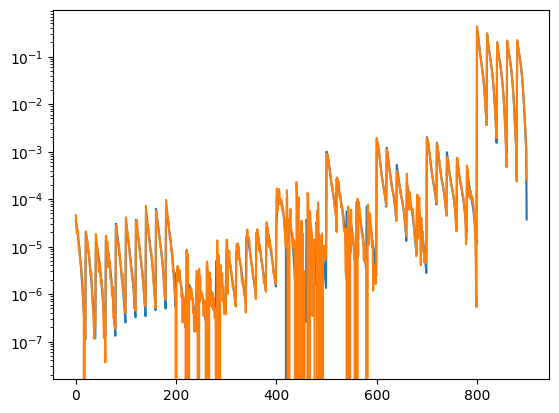

In [5]:
# What is the values we see in model?
'''
First 20 points is w(p) in the 1,1 tomographic bin. The next 20 is int he 1,2 tomographic bin. etc.
'''

plt.plot(model)
plt.plot(noisy_data_set1[0])
plt.yscale('log')

Text(0.5, 1.0, 'Residuals')

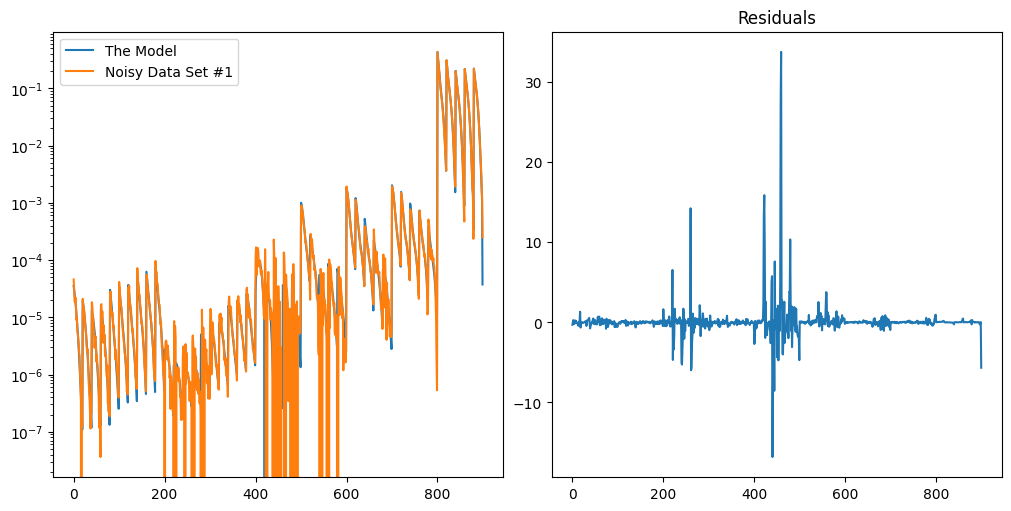

In [6]:
# check that the noisy data vector scatter around the truth

fig = plt.figure(constrained_layout=True, figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax_residuals = fig.add_subplot(1, 2, 2)
    
    
ax.plot(model, label='The Model' )
ax.plot(noisy_data_set1[0], label='Noisy Data Set #1')
ax.set_yscale('log')
ax.legend(loc='best')

residuals = (model-noisy_data_set1[0])/model
ax_residuals.plot(residuals)
ax_residuals.set_title('Residuals')


## Task 2: 
#### Use the provided covariance matrix and the model as a reference.
### 2.1: Test if set 1 follows a $\chi^2$ distribution with the correct degrees of freedom, by measuring its mean and variance. 
### 2.2: Convince yourself, that the measured $\chi^2$ follows a $\chi^2$ distribution.

In [7]:
inv_cov = inv(cov)
chi2_dataset1 = []
chi2_dataset2 = []

# compute the chi^2 for all dv for noisy data set1
for i in range(len(noisy_data_set1)):
    differnce = model-noisy_data_set1[i]
    chi2_val = differnce.T @ inv_cov @ differnce
    
    chi2_dataset1.append(chi2_val)
    
# compute the chi^2 for all dv for noisy data set2
for i in range(len(noisy_data_set2)):
    differnce = model-noisy_data_set2[i]
    chi2_val = differnce.T @ inv_cov @ differnce
    
    chi2_dataset2.append(chi2_val)

Mean for Dataset 1:  899.876909140814
Variance for Dataset 1:  1813.4197212350753
---------------------------------------------
Mean for Dataset 2:  899.7974793175459
Variance for Dataset 2:  1776.8258002134423


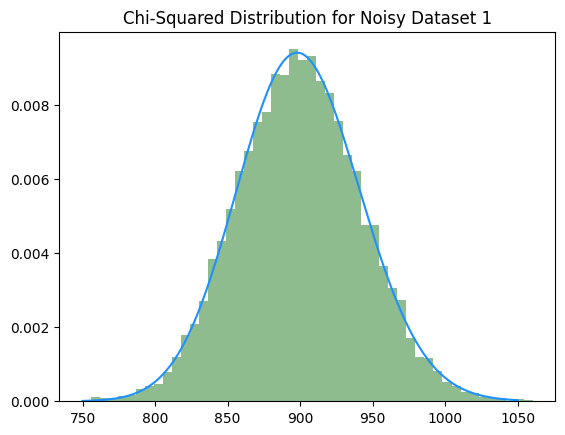

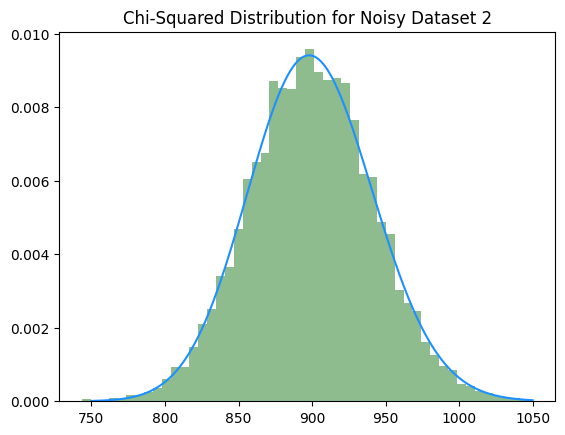

In [8]:
# What should the mean and variance should be?
'''
For the chi-squared distribution the mean is 'k' which is the degrees of freedom. We expect this to be 900.
The variance for the chi-squared distribution is '2k' which we expect to be 1800.
'''

# At high degress of freedom (k) the chi2-distribution tends to become a Gaussian

print('Mean for Dataset 1: ', np.mean(chi2_dataset1))
print('Variance for Dataset 1: ', np.var(chi2_dataset1))
print('---------------------------------------------')
print('Mean for Dataset 2: ', np.mean(chi2_dataset2))
print('Variance for Dataset 2: ', np.var(chi2_dataset2))

# is the overall distribution right?
x = np.linspace(750,1050,1000)
plt.plot( x, chi2_scp.pdf(x,900), color='dodgerblue')
plt.hist(chi2_dataset1, bins=50, density=True, color='darkseagreen')
plt.title('Chi-Squared Distribution for Noisy Dataset 1')
plt.show()

# is the overall distribution right?
x = np.linspace(750,1050,1000)
plt.plot( x, chi2_scp.pdf(x,900), color='dodgerblue')
plt.hist(chi2_dataset2, bins=50, density=True, color='darkseagreen')
plt.title('Chi-Squared Distribution for Noisy Dataset 2')
plt.show()




### After convincing us that the two sets actually follow a $\chi^2$ distribution, if we use the analytical covariance matrix, we want to check if that is also true if we measure the covariance matrix from simulations. 
### As running simulations is too expensive, we simulate measurements from simulations with the created set 2. 
### Task 3: As a preparation, please measure the numerical covariance matrix from [500,1000,5000,10000] data vectors from set 2. What do you observe in the correlation matrix? Are the covariances positive semi-definite?

In [9]:
cov_num500 = np.cov(noisy_data_set2[:500].T)
cov_num1000 = np.cov(noisy_data_set2[:1000].T)
cov_num5000 = np.cov(noisy_data_set2[:5000].T)
cov_num10000 = np.cov(noisy_data_set2[:10000].T)


In [10]:
print(cov_num500.shape, cov_num1000.shape, cov_num5000.shape, cov_num10000.shape)

(900, 900) (900, 900) (900, 900) (900, 900)


Checking the Covariances are positive semi-definite by checking whether there are any negative eigenvalues.

In [11]:
# Calculating the eigenvalues of the covariance matrices
eigenvals_500 = eigvals(cov_num500)
eigenvals_1000 = eigvals(cov_num1000)
eigenvals_5000 = eigvals(cov_num5000)
eigenvals_10000 = eigvals(cov_num10000)

# Checking if there are any negative eigenvalues 
print('Any negative eigenvalues for 500: ' + str(np.any(eigenvals_500<0)) )
print('Any negative eigenvalues for 1000: ' + str(np.any(eigenvals_1000<0)) )
print('Any negative eigenvalues for 5000: ' + str(np.any(eigenvals_5000<0)) )
print('Any negative eigenvalues for 10000: ' + str(np.any(eigenvals_10000<0)) )

print('')
print('This makes sense since we expect there to be negative eigenvalues in our covariance matrix when n < m.')

Any negative eigenvalues for 500: True
Any negative eigenvalues for 1000: False
Any negative eigenvalues for 5000: False
Any negative eigenvalues for 10000: False

This makes sense since we expect there to be negative eigenvalues in our covariance matrix when n < m.


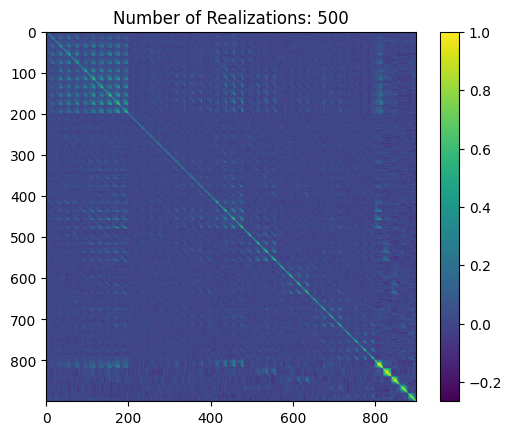

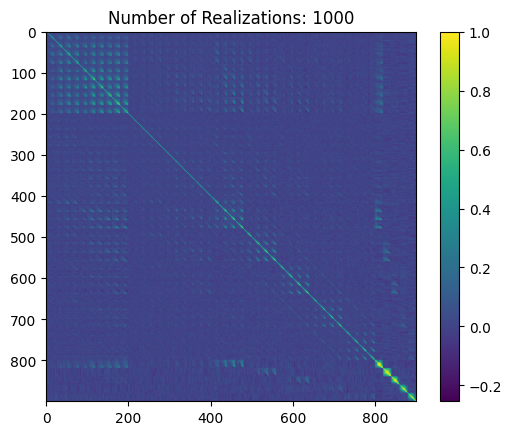

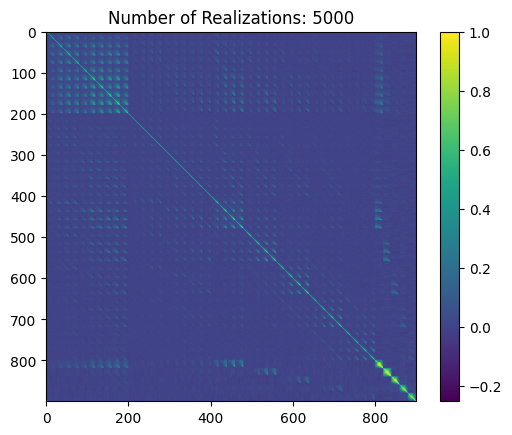

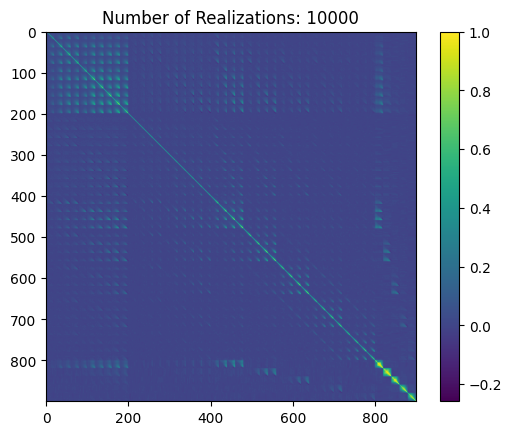

In [12]:
cov_matrices = [cov_num500, cov_num1000, cov_num5000, cov_num10000]
titles = [500,1000,5000,10000]

for cov, numofrealize in zip(cov_matrices,titles):
    
    plt.imshow( cov/np.outer( np.sqrt(np.diag(cov)), np.sqrt(np.diag(cov)) ) )
    plt.colorbar()
    plt.title('Number of Realizations: ' + str(numofrealize))
    plt.show()


What do I observe?

- From first glance of all 4 covaraince matices appear to be very similar looking but if we look closely there is more noise in the covariance matrix for small number of relizations. The covariance matrix looks 'smooother' when we compare the n=500 and n=10,000 relization cov matrix.
- For all 4, all of them have a clear diagonal with covariance ~1
- For all 4, there are some significant cross-correlation in both the top left and top right 'box' (the top left box being about 200x200 in dimension and 100x100 ranging from 800-900)

### Task 4: Test for all four covariance matrices if you recover a $\chi^2$ distribution with the mean and variance. What do you observe? 

In [15]:
print( np.cov(noisy_data_set2.T).shape )
print(cov_num500.shape)

(900, 900)
(900, 900)


The mean is: 3564893607518757.0
The variance is: 2.366788745860756e+34


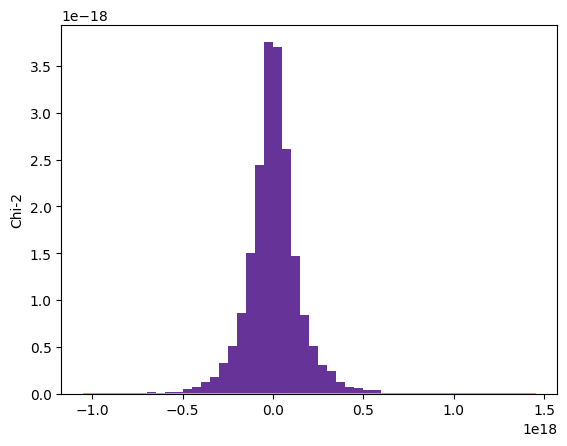

The mean is: 9183.095320614888
The variance is: 1923188.2871276948


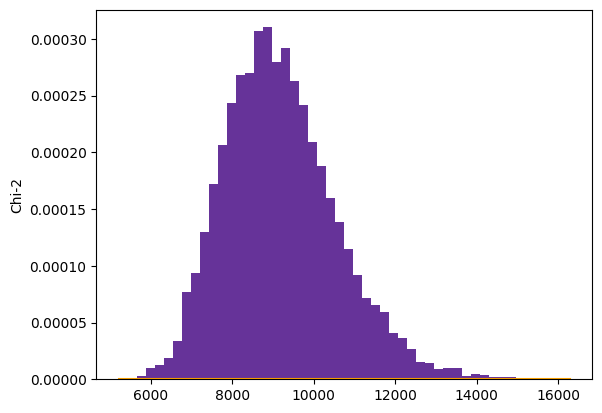

The mean is: 1096.899814131002
The variance is: 3262.6084582681165


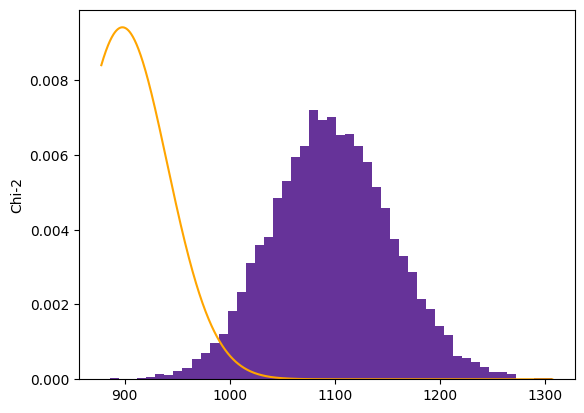

The mean is: 988.819867622364
The variance is: 2404.432150706029


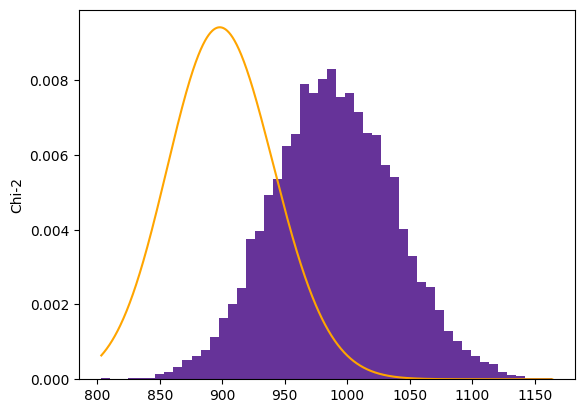

In [18]:
cov_matrices = [cov_num500, cov_num1000, cov_num5000, cov_num10000]

def compute_chi2(covariace_matrix):
    chi2_vals = []
    
    inv_cov = inv(covariace_matrix)
    
    for i in range(len(noisy_data_set1)):
        difference = model - noisy_data_set1[i]
        chi2_val = difference.T @ inv_cov @ difference
        chi2_vals.append(chi2_val)
        
    return(chi2_vals)
    

def plot_chi2_distributions(chi2_vals, covariace_matrix):
    
    print("The mean is: " + str(np.mean(chi2_vals)))
    print("The variance is: " + str(np.var(chi2_vals)))
    
    _, bins, _ = plt.hist(compute_chi2(covariace_matrix), bins=50, density=True, color='rebeccapurple')
    x = np.linspace( min(bins), max(bins),1000)
    
    plt.plot( x, chi2_scp.pdf(x,900), color='orange')
    plt.ylabel('Chi-2')
    plt.show()


plot_chi2_distributions( compute_chi2(cov_num500), cov_num500)
plot_chi2_distributions( compute_chi2(cov_num1000), cov_num1000 )
plot_chi2_distributions( compute_chi2(cov_num5000), cov_num5000)
plot_chi2_distributions( compute_chi2(cov_num10000), cov_num10000)

''' 
Comment on the results:

The histogram of the chi2 values at first glance (without considering the orange chi2 distribution)
would seem to follow a chi2 distribution but as we print the mean/variance values we see that
the mean and variance are not what we expect. We expect the mean to be 900 and variance to be 
~1800 (2*mean). Obviously, the covariance matrices made up of 500 and 1000 realizations are by
far the worst as we require that the number of relizations (n) to be greater than or equal to 
the number of dimensions (m). 

We would expect that the covariance matrix made from all 10,000 reliazation would be perfect but
that is not the case as the mean and variance are not the expected values. They are shifted to the right
compared to the chi2 distribution we expect (the orange line). The chi2 values are biased. 

'''


### Task 5: Repeat the same exercise from before, but debias your inverse covriance matrix with the so-called Hartlap factor. What do you observe?

The mean is: -862695280839425.4
The variance is: 5.1509057890015385e+33


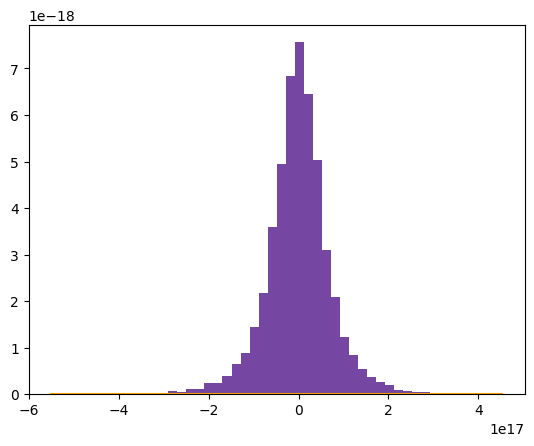

The mean is: 897.423153598689
The variance is: 17920.2783601446


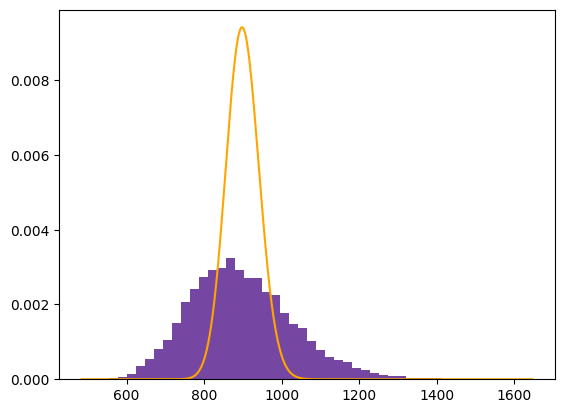

The mean is: 900.4601510281818
The variance is: 2237.198882703333


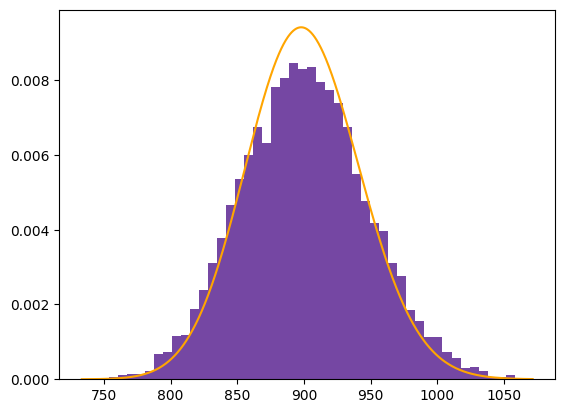

The mean is: 899.6861561694002
The variance is: 1992.8278233019919


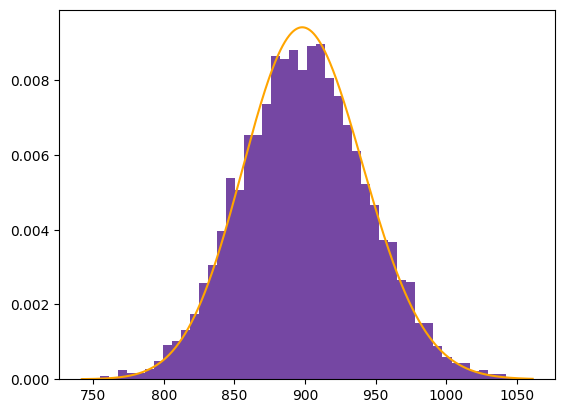

" \nWhat do I observe?\n\nAfter applying the Hartlap factor we notice that we obtain mean and variance values \nfor the chi2 distribution which we expect (mean of 900 and variance 1800). We do make\nnote that even when we use all 10,000 relizations in our covariance matrix the \nvariance is still not where we expect it to be. This indicates the spread in\nthe chi2 values that are calculated.\n\nIf my understanding if correct, the varaince is essentially a reflection of how big\nthe posterior distribution is. A larger posterior distribution would lead to a larger\nvariance but it also increases the likelyhood that the true value is in the posterior \ndistribution.\n\nWhen using the Hartlap factor we need to ensure we have enough realizations (n) such that \nthe variance converges. The variance should be ~1800 which even for n=10,000 is still \noff from that value by nearly 200 but it's mucher closer than when we use less \nrealizations (500,1000,5000).\n\n"

In [17]:
def apply_Hartlap_factor( num_of_realizations, num_of_dimensions, covariance_matrix):
    

    n_r = num_of_realizations # number of realisations used
    n_d = num_of_dimensions # diemension of the model 
    h = (n_r-1)/(n_r-n_d-2)

    inv_cov = inv(covariance_matrix)/h

    chi2_vals = []
    
    for i in range(len(noisy_data_set1)):
        difference = model - noisy_data_set1[i]
        chi2_val = difference.T @ inv_cov @ difference
        chi2_vals.append(chi2_val)
    
    print("The mean is: " + str(np.mean(chi2_vals)))
    print("The variance is: " + str(np.var(chi2_vals)))

    _, bins, _ = plt.hist(chi2_vals, bins=50, density=True, color='rebeccapurple', alpha=0.9)
    x = np.linspace( min(bins), max(bins),1000)

    plt.plot( x, chi2_scp.pdf(x,900), color='orange')
    plt.show()
    
#.... plot and check mean and variance

apply_Hartlap_factor( 500, 900, cov_num500)
apply_Hartlap_factor( 1000, 900, cov_num1000)
apply_Hartlap_factor( 5000, 900, cov_num5000)
apply_Hartlap_factor( 10000, 900, cov_num10000)

''' 
What do I observe?

After applying the Hartlap factor we notice that we obtain mean and variance values 
for the chi2 distribution which we expect (mean of 900 and variance 1800). We do make
note that even when we use all 10,000 relizations in our covariance matrix the 
variance is still not where we expect it to be. This indicates the spread in
the chi2 values that are calculated.

If my understanding if correct, the varaince is essentially a reflection of how big
the posterior distribution is. A larger posterior distribution would lead to a larger
variance but it also increases the likelyhood that the true value is in the posterior 
distribution.

When using the Hartlap factor we need to ensure we have enough realizations (n) such that 
the variance converges. The variance should be ~1800 which even for n=10,000 is still 
off from that value by nearly 200 but it's mucher closer than when we use less 
realizations (500,1000,5000).

'''

### Task 6: Repeat task 5 again, but this time, test if set 2 also follows a $\chi^2$ distribution. What do you observe?

The mean is: -299821217911663.7
The variance is: 1.4060556183292425e+34


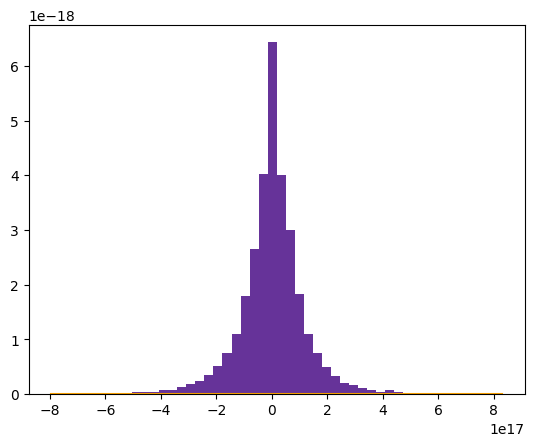

The mean is: 822.4384094057923
The variance is: 77426.88076142268


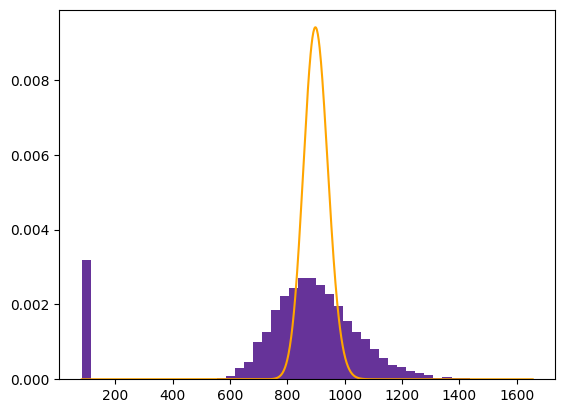

The mean is: 818.5676696920747
The variance is: 8141.182949388139


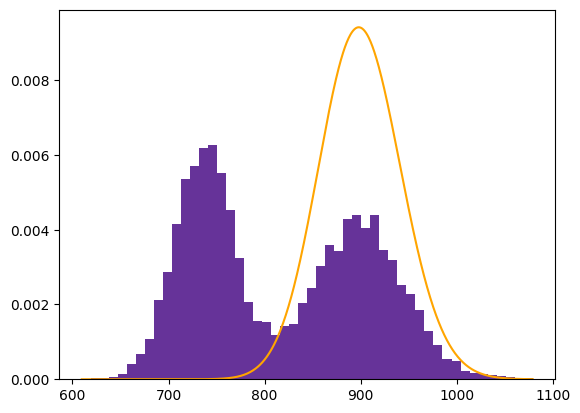

The mean is: 818.9089275706116
The variance is: 1380.6656750239554


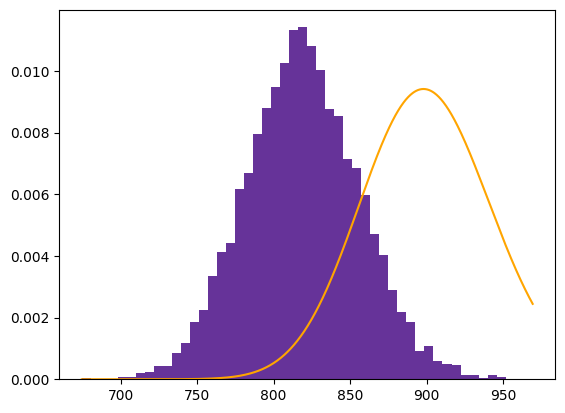

In [27]:
def apply_Hartlap_factor_set2( num_of_realizations, num_of_dimensions, covariance_matrix):
    

    n_r = num_of_realizations # number of realisations used
    n_d = num_of_dimensions # diemension of the model 
    h = (n_r-1)/(n_r-n_d-2)

    inv_cov = inv(covariance_matrix)/h

    chi2_vals = []
    
    for i in range(len(noisy_data_set2)):
        difference = model - noisy_data_set2[i]
        chi2_val = difference.T @ inv_cov @ difference
        chi2_vals.append(chi2_val)
    
    print("The mean is: " + str(np.mean(chi2_vals)))
    print("The variance is: " + str(np.var(chi2_vals)))

    _, bins, _ = plt.hist(chi2_vals, bins=50, density=True, color='rebeccapurple')
    x = np.linspace( min(bins), max(bins),1000)

    plt.plot( x, chi2_scp.pdf(x,900), color='orange' )
    plt.show()
    
#.... plot and check mean and variance

apply_Hartlap_factor_set2( 500, 900, cov_num500)
apply_Hartlap_factor_set2( 1000, 900, cov_num1000)
apply_Hartlap_factor_set2( 5000, 900, cov_num5000)
apply_Hartlap_factor_set2( 10000, 900, cov_num10000)

    
# what is happening in comparison to the taak before?

'''

Compared to the task before we see that set 2 doesn't follow a chi-2 distribution, especially at smaller number
realizations. For example, when n=5000, we see a double peak. This is because 5000 of the 10,000 realizations
were used to generate the covaraince matrix while the other 5000 wasn't. The peak we see at lower values is the
5000 realizatios we used to make the covariance matrix while the other 5000 is what seems to fit under the 
orange, expected chi2 distribution. 

When we use all 10,000 realizations we see that the mean and variance are lower than expected and the chi2
values are all completely biased since we measured the chi2-distribution on the data that was used to
generate the covariance matrix.

After my discussion with Pierre, I've come to the understanding that if we were to measure the chi2-
distribution on the data we used to generate a covariance matrix, if we ensure that the number of
realizations was very high then the mean we get from the chi2 distribution will match our expectation.
I tested this in the cell after this one where I repeated task #6 using n=80,000 and n=100,000.

'''



Below is extra stuff I did to really convince myself what is going on....

The mean is: 889.8634194966573
The variance is: 1738.9635088506066


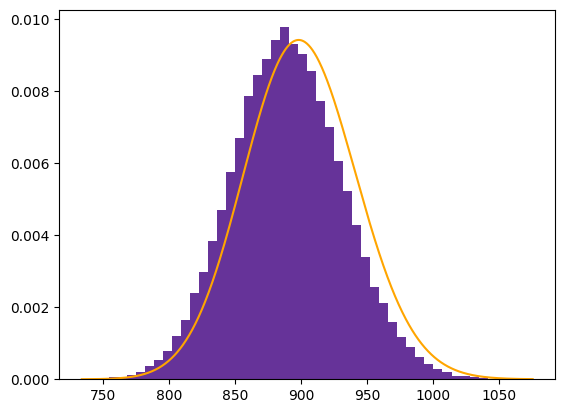

The mean is: 891.8904722139428
The variance is: 1749.9019821216398


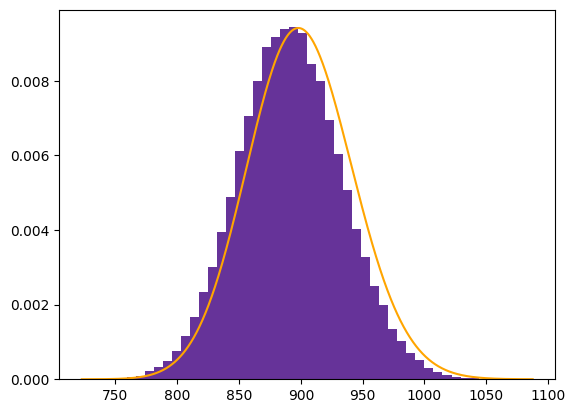

In [9]:
# Testing what the chi2 distribution looks like if we have a noisy dataset with A LOT more realizations

def do_task_6_with_moreN( n ):
    noisy_data_set123 = np.random.multivariate_normal(mean=model, cov=cov, size=n)
    cov_test_num300000 = np.cov(noisy_data_set123[:n].T)

    n_r = n # number of realisations used
    n_d = 900 # diemension of the model 
    h = (n_r-1)/(n_r-n_d-2)

    inv_cov = inv(cov_test_num300000)/h

    chi2_vals = []

    for i in range(len(noisy_data_set123)):
        difference = model - noisy_data_set123[i]
        chi2_val = difference.T @ inv_cov @ difference
        chi2_vals.append(chi2_val)

    print("The mean is: " + str(np.mean(chi2_vals)))
    print("The variance is: " + str(np.var(chi2_vals)))

    _, bins, _ = plt.hist(chi2_vals, bins=50, density=True, color='rebeccapurple')
    x = np.linspace( min(bins), max(bins),1000)

    plt.plot( x, chi2_scp.pdf(x,900), color='orange' )
    plt.show()
    
do_task_6_with_moreN(80000)
do_task_6_with_moreN(100000)

''' 
As expected, if we increase the number of realizations past n=10,000 we see that 
the chi2 distribution we get from testing against the same noisy dataset the  
mean and variance get better and better.

What this shows is that, with larger and larger increasing realizations the correction
made by the Hartlap factor is less and less. One might argue that is n = 1 million then
we might not need to to apply the Hartlap factor, but, as per my discussion with Pierre,
it never hurts to apply the Hartlap factor even when we have a very large number of
relizations.
'''

### Bonus Task 1: Create a new set of 10000 noisy data vectors using the numerical covariance matrix measured from 1000 noisy data vectors. Is it possible to reduce the noise in the covariance matrix with this method? Test if set 1 follows a $\chi^2$ distribution which the newly created covaraince matrix. What do you observe?

The mean is: 10073.379785250943
The variance is: 2287191.425925954


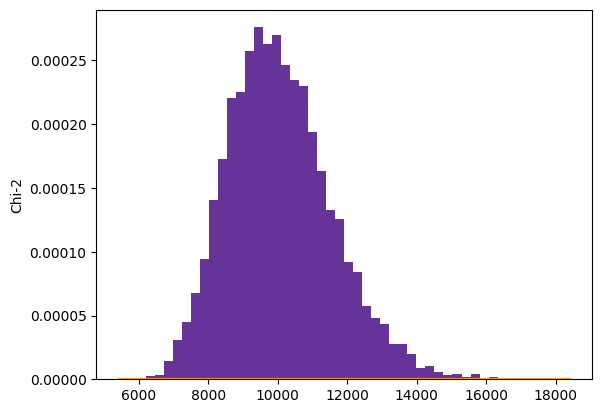

'\n\n    Is it possible to reduce the noise in the covariance matrix with this method?\n    \n    No, with this method we can not reduce the noice in the covariance matrix. The reason \n    for this is because we are generating a new set of 10,000 noisy data vectors from an\n    already noisy covariance matrix (cov_num1000). Essentially, even if we were to generate \n    significantly more than 10,000 noisy data vectors the noise will NOT get better since \n    the data vectors are inherently already very noisy from the noisy numerical covariance\n    matrix.\n    \n    What do I observe?\n    \n    We observe from the chi2 histrogram below that the chi2 values do not follow a\n    typical chi2-distributions. The mean and the variance are very very wrong. \n    Additionally, the orange line (which appears completely flat) is what we would\n    expect of a chi2-distribution. \n    \n'

In [14]:
noisy_data_set3 = np.random.multivariate_normal(mean=model, cov=cov_num1000, size=10000)
cov_num10000_set3 = np.cov(noisy_data_set3[:10000].T)

def compute_chi2(covariace_matrix):
    chi2_vals = []
    
    inv_cov = inv(covariace_matrix)
    
    for i in range(len(noisy_data_set1)):
        difference = model - noisy_data_set1[i]
        chi2_val = difference.T @ inv_cov @ difference
        chi2_vals.append(chi2_val)
        
    return(chi2_vals)
    

def plot_chi2_distributions(chi2_vals, covariace_matrix):
    
    print("The mean is: " + str(np.mean(chi2_vals)))
    print("The variance is: " + str(np.var(chi2_vals)))
    
    _, bins, _ = plt.hist(compute_chi2(covariace_matrix), bins=50, density=True, color='rebeccapurple')
    x = np.linspace( min(bins), max(bins),1000)
    
    plt.plot( x, chi2_scp.pdf(x,900), color='orange')
    plt.ylabel('Chi-2')
    plt.show()


plot_chi2_distributions( compute_chi2(cov_num10000_set3), cov_num10000_set3)

"""

    Is it possible to reduce the noise in the covariance matrix with this method?
    
    No, with this method we can not reduce the noice in the covariance matrix. The reason 
    for this is because we are generating a new set of 10,000 noisy data vectors from an
    already noisy covariance matrix (cov_num1000). Essentially, even if we were to generate 
    significantly more than 10,000 noisy data vectors the noise will NOT get better since 
    the data vectors are inherently already very noisy from the noisy numerical covariance
    matrix.
    
    What do I observe?
    
    We observe from the chi2 histrogram below that the chi2 values do not follow a
    typical chi2-distributions. The mean and the variance are very very wrong. 
    Additionally, the orange line (which appears completely flat) is what we would
    expect of a chi2-distribution. 
    
"""

### Bonus task 2: What is the minimum number of data vectors such that the inverse covariance matrix is non-singular? What is an easy tool to test this? Is an analytical covariance matrix always invertible? What can you do if it is not invertible? 

a)

b)

c)

d)